In [118]:
#Hago esto para que este notebook pueda acceder a carpetas y archivos que estén por encima de el
import sys
import os

root_path = os.path.abspath("..")
sys.path.append(root_path)


In [119]:
import pandas as pd

df = pd.read_csv("../data/processed/supervised_dataset.csv", parse_dates=["datetime"])
df.head()


,coin,datetime,price,volume,ret_log,vol_rolling,volumen_promedio,drawdown,target_up
0,avalanche-2,2024-12-06,50.621868,1.550537e+09,NaN,NaN,NaN,0.000000,0
1,avalanche-2,2024-12-07,52.657180,1.059220e+09,0.039419,NaN,NaN,0.000000,0
2,avalanche-2,2024-12-08,51.757540,5.957050e+08,-0.017232,NaN,NaN,-0.017085,0
3,avalanche-2,2024-12-09,54.181289,8.137661e+08,0.045766,NaN,NaN,0.000000,0
4,avalanche-2,2024-12-10,45.188717,1.822937e+09,-0.181488,NaN,NaN,-0.165972,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   coin              3210 non-null   object        
 1   datetime          3210 non-null   datetime64[ns]
 2   price             3210 non-null   float64       
 3   volume            3210 non-null   float64       
 4   ret_log           3200 non-null   float64       
 5   vol_rolling       2910 non-null   float64       
 6   volumen_promedio  2920 non-null   float64       
 7   drawdown          3210 non-null   float64       
 8   target_up         3210 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 225.8+ KB


In [121]:

from sklearn.preprocessing import LabelEncoder, StandardScaler 

encoder = LabelEncoder() 

for col in df.columns: 

  if df[col].dtype=="object": 

    df[col] = encoder.fit_transform(df[col]) 

  

df.head() 

 

,coin,datetime,price,volume,ret_log,vol_rolling,volumen_promedio,drawdown,target_up
0,0,2024-12-06,50.621868,1.550537e+09,NaN,NaN,NaN,0.000000,0
1,0,2024-12-07,52.657180,1.059220e+09,0.039419,NaN,NaN,0.000000,0
2,0,2024-12-08,51.757540,5.957050e+08,-0.017232,NaN,NaN,-0.017085,0
3,0,2024-12-09,54.181289,8.137661e+08,0.045766,NaN,NaN,0.000000,0
4,0,2024-12-10,45.188717,1.822937e+09,-0.181488,NaN,NaN,-0.165972,0


In [122]:
#miramos si los datos están desbalanceados
df["target_up"].value_counts(normalize=True)


target_up
0    0.579128
1    0.420872
Name: proportion, dtype: float64

In [123]:
df.isnull().sum()

coin                  0
datetime              0
price                 0
volume                0
ret_log              10
vol_rolling         300
volumen_promedio    290
drawdown              0
target_up             0
dtype: int64

In [124]:
df['ret_log'] = df['ret_log'].fillna(value=df['ret_log'].mean())
df['vol_rolling'] = df['vol_rolling'].fillna(value=df['vol_rolling'].mean())
df['volumen_promedio'] = df['volumen_promedio'].fillna(value=df['volumen_promedio'].mean())

In [125]:
df.isnull().sum()

coin                0
datetime            0
price               0
volume              0
ret_log             0
vol_rolling         0
volumen_promedio    0
drawdown            0
target_up           0
dtype: int64

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

feature_cols = ["coin","ret_log", "vol_rolling", "volumen_promedio", "drawdown"]

X = df[feature_cols]
y = df["target_up"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((2407, 5), (803, 5))

In [127]:

from sklearn.linear_model import LogisticRegression


modelo = LogisticRegression()
modelo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_pred = modelo.predict(X_test)

print("Accuracy de la regresión logistica:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy de la regresión logistica: 0.5990037359900373
Matriz de confusión:
 [[388  77]
 [245  93]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.61      0.83      0.71       465
           1       0.55      0.28      0.37       338

    accuracy                           0.60       803
   macro avg       0.58      0.55      0.54       803
weighted avg       0.59      0.60      0.56       803



MIRAMOS EL ACURRACY DE KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier #Importamos el modelo KNN
import matplotlib.pyplot as plt #importamos plt para poder saber cual es la cantidad optima de vecinos

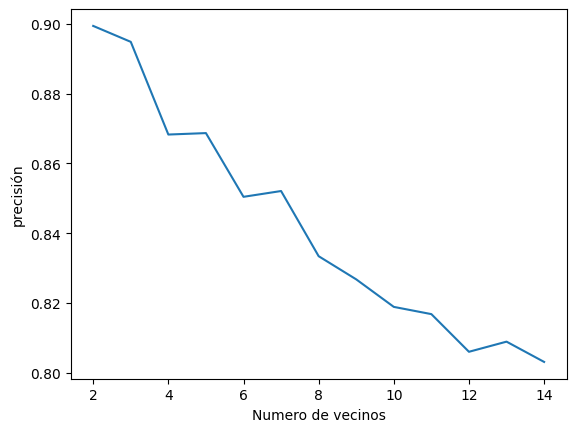

In [130]:
#Encontramos la cantidad optima de K vecinos con los que debemos aplicar nuestro modelo
distancia = []

for i in range(2,15):
  knnprueba= KNeighborsClassifier(n_neighbors=i)
  knnprueba.fit(X_train,y_train)
  distancia.append(knnprueba.score(X_train,y_train))

plt.plot(range(2,15),distancia)
plt.xlabel('Numero de vecinos')
plt.ylabel('precisión')
plt.show()

In [131]:
modelo2 = KNeighborsClassifier(n_neighbors=3) #En el hiperparametro n_neighbors ponemos la cantidad de vecinos optimos que nos dió la grafica
modelo2.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [141]:
y_pred2 = modelo2.predict(X_test)
y_pred2proba = modelo2.predict_proba(X_test)
print(y_pred2proba)

[[0.         1.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]


In [137]:
#Presición
print(accuracy_score(y_test,y_pred2))
#matriz de confusión
print(confusion_matrix(y_test,y_pred2))

0.7945205479452054
[[392  73]
 [ 92 246]]


EXPORTAMOS LOS RESULTADOS DE KNN A UN DF EN PROCESSED

In [ ]:
# Elijo las mismas variables que usé para entrenar
X_all = df[["coin","ret_log", "vol_rolling", "volumen_promedio", "drawdown"]]

# Escalo todo el dataframe, todo ya que no estoy evaluando la calidad del modelo
X_all_scaled = scaler.transform(X_all)

# lleno una columna con las predicciones
df["pred_up"] = modelo2.predict(X_all_scaled)

# Lleno una columna con las probabilidades de que suba o que baje
df["prob_up"] = modelo2.predict_proba(X_all_scaled)[:, 1]

# Defino el horizonte para el cual estoy prediciendo, en este caso para dentro de 45 dias
df["horizon"] = 45

# Estas son las columnas que voy a usar en power BI
cols = [
    "coin", "datetime", "price",
    "ret_log", "vol_rolling", "volumen_promedio", "drawdown",
    "target_up", "pred_up", "prob_up", "horizon"
]

df_pred = df[cols].copy() #hacemos una copia del df con las columnas que nos interesan

#guardo el csv final
output_path = "../data/processed/predictions_45d.csv"
df_pred.to_csv(output_path, index=False)

print("Predicciones generadas en:", output_path)
df_pred.head()

#Creo una variable con el numero de cluster asociado a cada moneda
clusters = pd.read_csv("../data/processed/crypto_clusters.csv")
clusters["coin"] = encoder.transform(clusters["coin"]) #vuelvo los nombres de las monedas numeros para poder hacer el merge


# Uno las predicciones con clusters por la columna 'coin'
df_pred = df_pred.merge(clusters[["coin", "cluster"]], on="coin", how="left")

# #Vuelvo a guardar el archivo pero ahora tiene el numero de cluster
output_path = "../data/processed/predictions_45d.csv"
df_pred.to_csv(output_path, index=False)
print("Predicciones + clusters guardadas en:", output_path)



Predicciones generadas en: ../data/processed/predictions_45d.csv
Predicciones + clusters guardadas en: ../data/processed/predictions_45d.csv
